# Introduction

Merge sort has an expected run time of Θ(n log n); insertion sort has an expected run time of Θ(_n_2). As such, we know that Merge sort will be faster for very large n.  Insertion sort, however, turns out to be faster for very small n. Let's try to figure out how small.

We will compare implementations of Merge sort and Insertion sort, testing each over a range of values for n. We will then plot a graph of the results, which should indicate the value of n where the lines cross (or a range of values where they essentially overlap).

# Hypothesis

For small values of n, Insertion sort will be faster than Merge sort. This is because the quadratic time complexity of Insertion sort (Θ(n^2)) means it performs well on small inputs with a relatively low overhead.

As n increases, Merge sort's time complexity (Θ(n log n)) becomes more efficient compared to Insertion sort. This is due to Merge sort's divide-and-conquer strategy, which is well-suited for large input sizes, and it's generally considered more efficient for large arrays.

There will be a point, a crossover point, where the performance of Merge sort becomes better than Insertion sort. The exact crossover point, where Merge sort becomes more efficient than Insertion sort, depends on various factors, including the specific implementations of the algorithms, hardware, and programming language. For this particular instance, my prediction is 10 $\le$ $n$ $\le$ 50, where $n$ is the size of the input.

# Methods

We import the necessary modules for our experiment.

In [11]:
import timeit # To time our algorithms
import random # To generate random lists
import matplotlib.pyplot as plt # To generate the plots

## Implementing merge sort

In [24]:
def merge_sort(seq):
    '''Recursive implementation of merge sort'''
    if len(seq) <= 1: # already sorted
        return seq
    
    def merge_sort_helper(left, right):
        '''Merging back the split sequences'''
        res = []
        i = 0
        j = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                res.append(left[i])
                i += 1
            else:
                res.append(right[j])
                j += 1

        res += left[i:]
        res += right[j:]
        return res

    
    # split the sequence
    mid = len(seq) // 2
    left = merge_sort(seq[:mid])
    right = merge_sort(seq[mid:])
    
    return merge_sort_helper(left, right)


## Implementing insertion sort

In [25]:
def insertion_sort(seq):
    '''Iterative implementation of insertion sort'''
    for i in range(1, len(seq)):
        curr = seq[i]
        j = i - 1
        while j >= 0 and seq[j] > curr:
            seq[j + 1] = seq[j]
            j -= 1
        seq[j + 1] = curr

    return seq

## Timing the sorting agorithms

We continuously generate three random lists of integers by appending a randomly generated integer to each list. We choose 10000 as the maximum length and the maximum value of an element in the list. According to our hypothesis, the expected crossover point should be well within this range.

We run both insertion and merge sort on them 10 times in a row for every increment of 500 to the input size . The run time for a single iteration of a sort is expected to be very short. We do multiple iterations of each sort to get a larger measurement so that we can tell the difference and calculate the time for a single run of a sort with better precision.

We then find the average time needed for all three lists and record that as the average execution time used by the sorting algorithm for that input size. We maintain two parallel lists to record the time.

In [132]:
random_list_1 = []
random_list_2 = []
random_list_3 = []

max_length = 10000 # The maximum length of the lists
max_value = 10000
insertion_sort_times = []
merge_sort_times = []
crossed_over = False

for i in range(max_length):
    random_list_1.append(random.randint(0, max_value))
    random_list_2.append(random.randint(0, max_value))
    random_list_3.append(random.randint(0, max_value))
    
    # Timing the insertion sort
    if i % 500 == 0:
        start_time = timeit.default_timer()
        for j in range(10): # Multiple iterations of asort to get larger measurement
            tmp_list = random_list_1
            tmp_list = insertion_sort(tmp_list)
            tmp_list = random_list_2
            tmp_list = insertion_sort(tmp_list)
            tmp_list = random_list_3
            tmp_list = insertion_sort(tmp_list)

        execution_time = timeit.default_timer() - start_time
        insertion_sort_times.append((execution_time / 10) / 3) # average time for a single iteration of a sort on a list

        # Timing the merge sort
        start_time = timeit.default_timer()
        for j in range(10): # Multiple iterations of a sort to get larger measurement
            tmp_list = random_list_1
            tmp_list = merge_sort(tmp_list)
            tmp_list = random_list_2
            tmp_list = merge_sort(tmp_list)
            tmp_list = random_list_3
            tmp_list = merge_sort(tmp_list)

        execution_time = timeit.default_timer() - start_time
        merge_sort_times.append((execution_time / 10) / 3) # average time for a single iteration of a sort on a list
        
        if insertion_sort_times[-1] > merge_sort_times[-1] and not crossed_over:
            print(f"Crossover point: {i}")
            crossed_over = True

    

Crossover point: 0


# Results

We plot the execution times for each sort.

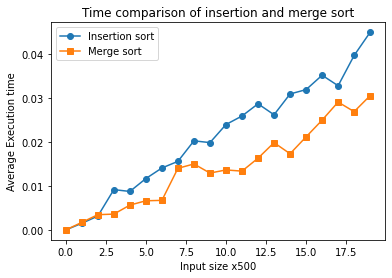

In [135]:
# Plotting the insertion sort execution times
plt.plot(insertion_sort_times, label='Insertion sort', marker='o')

# Plotting the merge sort execution times
plt.plot(merge_sort_times, label='Merge sort', marker='s')

# Adding labels and title
plt.xlabel('Input size x500')
plt.ylabel('Average Execution time')
plt.title('Time comparison of insertion and merge sort')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# Discussion

From the above graph, the observed crossover point is between $0 \le n \le 75 (0.25 \times 500)$, where $n$ is the input size. This range may shift slightly since we are using randomly generated lists, so I am expecting a 4-8% margin of error in my result. In future, I might run a few more experiments to record the different crossover points and determine the exact margin of error.

The most difficult part of the experiment was running multiple iterations of the sorts. Each sort takes a long execution time once the input size becomes significantly large, and getting results for those values was a tedious task on a laptop machine. In future, I might run this experiment with larger input sizes on a lab computer with a GPU that has high processing speeds.

The results obtained does support the hypothesis. Insertion sort has smaller execution times than merge sorts for smaller input size. As input size increases, merge sort becomes faster as insertion sort's execution time grows polynomially and overtakes merge sort's execution time at the crossover point. However, it is not a very smooth graph. There is a lot of jagged lines and the execution time function isn't always increasing with time. This may be due to other factors such as the amount of computational resources available (which is always changing).

# Conclusion

Under the conditions tested, Insertion sort produces a faster algorithm for $n < 75$, while Merge sort is faster for $n > 100$.  For $n$ between $75$ and $100$ the two sorting algorithms are indistinguishable.